# Creating features

Una vez que se descubren cuales son las features que tienen mas potencial para determinar la target, se pueden generar nuevas features operando matematicamente entre alguna de ellas.

Para descubrir que operaciones matemáticas realizar y que features elegir hay que:
- Entender las features y de que se trata el dataset.
- Investigar el problema que se intenta solucionar para adquirir conocimiento de campo del mismo.
- Usar data visualization para observar las patologías en las distribuciones de cada feature o relaciones entre ellas.

### Mathematical transforms

Una manera de sacar relaciones entre features es con expresiones matemáticas que las vinculen. Este tipo de generación de features está muy arraigada al conocimiento de campo que se tenga previamente.

##### Ejemplo: Automobile 1985 dataset. 

En este dataset hay varias features que describen el motor, de las cuales se podría calcular `stroke_ratio`, proveniente de la relación entre `stroke` y `bore`.

In [1]:
### Dataset loading

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)

automobile_df = df = pd.read_csv("datasets/automobile_1985_dataset.csv")

In [3]:
automobile_df['stroke_ratio'] = automobile_df['stroke'] / automobile_df['bore']
automobile_df[['stroke', 'bore', 'stroke_ratio']].head()

,stroke,bore,stroke_ratio
0,2.68,3.47,0.772334
1,2.68,3.47,0.772334
2,3.47,2.68,1.294776
3,3.40,3.19,1.065831
4,3.40,3.19,1.065831


Una combinación un poco mas complicada es para deducir el poder de desplazamiento de un motor

In [5]:
automobile_df["displacement"] = (
    np.pi * ((0.5 * automobile_df['bore']) ** 2) * automobile_df['stroke'] * automobile_df['num_of_cylinders']
)

##### Ejemplo: US Accidents dataset

Tambien la visualización de las features nos puede sugerir una transformación utilizando potencias o logaritmos. Por ejemplo, si observamos la distribución de la feature `WindSpeed` está muy sesgada, por lo tanto, aplicando logaritmo se puede visualizar mejor la distribución.

In [7]:
### Dataset loading
us_accidents_df = pd.read_csv('datasets/us_accidents_dataset.csv')

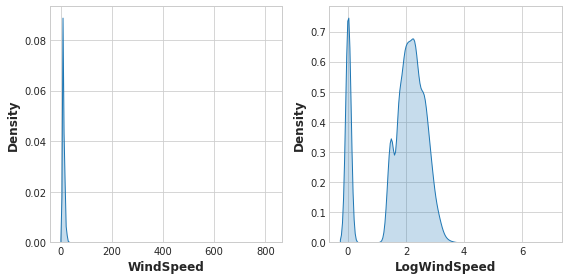

In [8]:
# If the feature has 0.0 values, use np.log1p (log(1+x)) instead of np.log
us_accidents_df["LogWindSpeed"] = us_accidents_df.WindSpeed.apply(np.log1p)

# Plot a comparison
fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.kdeplot(us_accidents_df.WindSpeed, shade=True, ax=axs[0])
sns.kdeplot(us_accidents_df.LogWindSpeed, shade=True, ax=axs[1]);

### Counts

En un dataset pueden haber features que describan la presencia o ausencia de una característica con valores binarios, `True` o `False`. En esos casos podría ser útil contar la cantidad de presencias que tiene cada fila.

##### Ejemplo: US accidents dataset

En este dataset hay varias features que indican si en el accidente había algun objeto cercano que pueda afectar. En ese caso, podemos contar la cantidad de objetos con funciones integradas en Pandas.

In [9]:
roadway_features = ["Amenity", "Bump", "Crossing", "GiveWay",
    "Junction", "NoExit", "Railway", "Roundabout", "Station", "Stop",
    "TrafficCalming", "TrafficSignal"]
us_accidents_df["RoadwayFeatures"] = us_accidents_df[roadway_features].sum(axis=1)

us_accidents_df[roadway_features + ["RoadwayFeatures"]].head(10)

,Amenity,Bump,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal,RoadwayFeatures
0,False,False,False,False,False,False,False,False,False,False,False,False,0
1,False,False,False,False,False,False,False,False,False,False,False,False,0
2,False,False,False,False,False,False,False,False,False,False,False,False,0
3,False,False,False,False,False,False,False,False,False,False,False,False,0
4,False,False,False,False,False,False,False,False,False,False,False,False,0
5,False,False,False,False,True,False,False,False,False,False,False,False,1
6,False,False,False,False,False,False,False,False,False,False,False,False,0
7,False,False,True,False,False,False,False,False,False,False,False,True,2
8,False,False,True,False,False,False,False,False,False,False,False,True,2
9,False,False,False,False,False,False,False,False,False,False,False,False,0


##### Ejemplo: Concrete dataset

Este dataset describe las combinaciones de elementos para generar distintos tipos de concreto. En este caso, se puede utilizar para saber cuantos componentes tiene cada uno.

In [10]:
### Dataset loading
concrete_df = pd.read_csv('datasets/concrete_dataset.csv')

In [11]:
components = [ "Cement", "BlastFurnaceSlag", "FlyAsh", "Water",
               "Superplasticizer", "CoarseAggregate", "FineAggregate"]
               
concrete_df["Components"] = concrete_df[components].gt(0).sum(axis=1)

concrete_df[components + ["Components"]].head(10)

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Components
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,5
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,5
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,5
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,4


### Group transforms

 Las transformaciones de grupo agregan información a través de múltiples filas agrupadas por alguna categoría. Con una transformación de grupo se pueden crear features como: "la media de ingresos en la zona donde reside una persona".

##### Ejemplo: Customers dataset

In [12]:
### Dataset loading
customer_df = pd.read_csv('datasets/customer_dataset.csv')

In [13]:
customer_df["AverageIncome"] = (
    customer_df.groupby("State")  # for each state
    ["Income"]                 # select the income
    .transform("mean")         # and compute its mean
)

customer_df[["State", "Income", "AverageIncome"]].head(10)

,State,Income,AverageIncome
0,Washington,56274,38122.733083
1,Arizona,0,37405.402231
2,Nevada,48767,38369.605442
3,California,0,37558.946667
4,Washington,43836,38122.733083
5,Oregon,62902,37557.283353
6,Oregon,55350,37557.283353
7,Arizona,0,37405.402231
8,Oregon,14072,37557.283353
9,Oregon,28812,37557.283353


Tambien se pueden calcular métricas como la frecuencia de aparición de cada estado con el método `.transform`, propio de Pandas. El mismo admite las siguientes transformaciones:
- mean
- max
- min
- median
- var
- std
- count

In [14]:
customer_df["StateFreq"] = (
    customer_df.groupby("State")["State"].transform("count") / customer_df.State.count()
)

customer_df[["State", "StateFreq"]].head(10)

,State,StateFreq
0,Washington,0.087366
1,Arizona,0.186446
2,Nevada,0.096562
3,California,0.344865
4,Washington,0.087366
5,Oregon,0.284760
6,Oregon,0.284760
7,Arizona,0.186446
8,Oregon,0.284760
9,Oregon,0.284760


### Conclusiones

Es bueno tener en cuenta las fortalezas y debilidades del modelo a la hora de crear features.

- Los modelos lineales aprenden naturalmente sumas y restas, pero no pueden aprender nada más complejo.
- Los ratios parecen ser difíciles de aprender para la mayoría de los modelos. Las combinaciones de ratios suelen dar mejores resultados.
- Los modelos lineales y las redes neuronales suelen funcionar mejor con features normalizadas. Las redes neuronales necesitan especialmente características escaladas a valores no muy alejados de 0.
- Los modelos de árbol (RandomForest y XGBoost) pueden aprender casi cualquier combinación de features, pero cuando una combinación es especialmente importante pueden beneficiarse de que se cree explícitamente, especialmente cuando los datos son limitados.
- Los recuentos (counts) son especialmente útiles para los modelos de árbol, ya que estos modelos no tienen una forma natural de agregar información entre muchas features a la vez.